### Recurrent Neural Network Demo

This script uses a RNN to generate simulated neuronal timeseries data.

In [94]:
import numpy as np
import random
import sys
import os

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

#Add the src folder to the sys.path list
sys.path.append('../src/')
sys.path.append('../lib/')
import data_config as dc
import rnn
from analysis import Analyzer

In [118]:
%load_ext autoreload
%autoreload

wormData = dc.kato_matlab.data()
rawData = Analyzer(wormData[0]['deltaFOverF'].T)
seq = rawData.timeseries
print(seq.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(3134, 107)


In [119]:
gen = rnn.generate_lstm_vanilla(seq)

('sequence chunks:', 3130)
('chunk width:', 1)
('vector dimension:', 107)
('batch size:', 10)
('X shape:', (3130, 1, 107))
Build model...
Epoch 1/2
3130/3130 [==============================] - 12s - loss: 0.1812    
Epoch 2/2
3130/3130 [==============================] - 13s - loss: 0.0932    
('Predicting with shape:', (10, 1, 107))


In [120]:
rnnData = Analyzer(gen)
print(rnnData.timeseries.shape)

(250, 107)


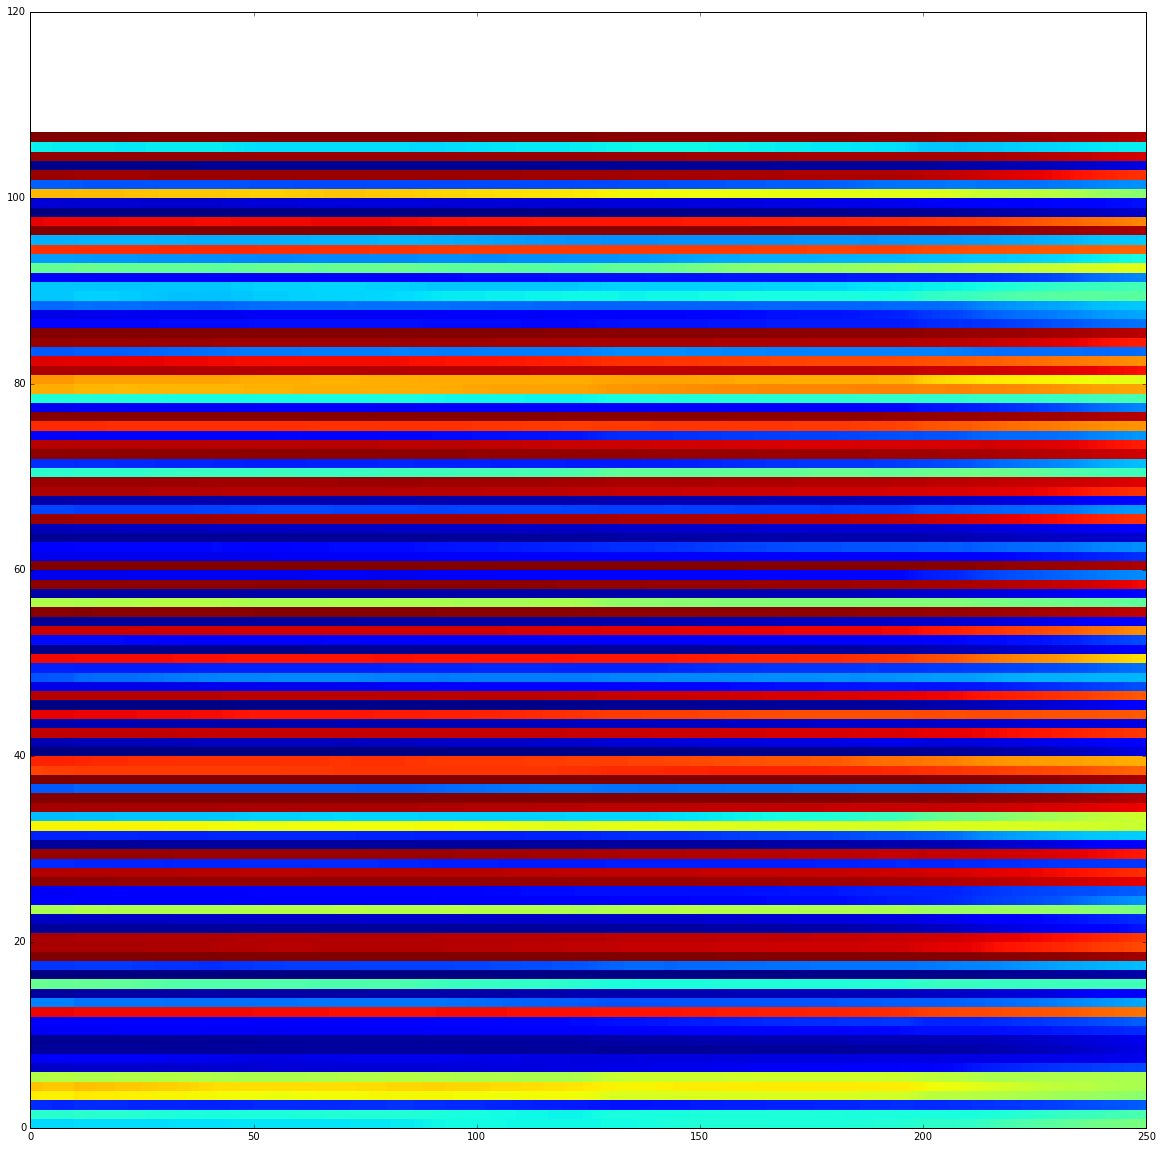

In [121]:
fig = plt.figure(figsize=(20,20))

ax_raw3 = fig.add_subplot(1, 1, 1)

rnnData.timeseries_plot(ax_raw3)

plt.show()